# Spark MLLilb Example: Clustering

Let's look at a clustering example in Spark MLLib.

Here, we are going to load the mtcars dataset. This has some stats on different models of cars.  Here, we will load the CSV file as a spark dataframe, and view it.

In [46]:
%matplotlib inline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans



In [1]:
dataset = spark.read.csv("../../datasets/walmart-triptype/train-transformed.csv.gz", header=True, inferSchema=True)


In [2]:
dataset.show()

+-----------+--------+-------+--------+------+----------+-----------+----------+------+---------------+------+-------+-------------------+---------+----------------+--------------------+-----------------------+-----------+----------+--------------+-------------+-----+-----------+-----------+------------------+------------------+------------+---------+--------------------------+-----------------+--------+----------------------+----------+---------------+-----------------------+------------------------+---------------------+-------------------+--------------+---------------------------+----------------------+------------+----------+---------------------+---------------+----------------+---------------------+----------------+--------+---------------+----------------+----------------+-----------------+---------------------+-------------+-----------------+------------+-----------+-----------------------+------------------+---------------+-------+-------+--------+------------+-------------+-

## Creating Vectors

Now that we have ourselves a dataframe, let's work on turning it into vectors.  We're going to vectorize 2 columns:

1. MPG
2. Number of cylineders.

What we'll do, is we'll use the VectorAssembler class to create a new column by the name of features. This will be a Vector.

In [43]:
columns = dataset.columns
columns.remove('VisitNumber')
columns.remove('TripType')

print(columns)

70
['Weekday', 'NumItems', 'Return', '1-HR PHOTO', 'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING', 'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR', 'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION', 'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY', 'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES', 'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14', 'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR', 'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS', 'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS', 'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES', 'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR', 'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER', 'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENSWEAR', 'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES', 'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE', 'PETS AND SUPP

In [34]:

assembler = VectorAssembler(inputCols=columns, outputCol="features")
featureVector = assembler.transform(dataset)


In [35]:
for row in featureVector.select('features').take(10):
    print("Vector: %s\n" % (str(row)))

Vector: Row(features=SparseVector(70, {0: 5.0, 1: -1.0, 2: 1.0, 23: -1.0}))

Vector: Row(features=SparseVector(70, {0: 5.0, 1: 2.0, 52: 1.0, 64: 1.0}))

Vector: Row(features=SparseVector(70, {0: 5.0, 1: 28.0, 2: 1.0, 19: 2.0, 20: 1.0, 33: 1.0, 44: 1.0, 51: 18.0, 53: 4.0}))

Vector: Row(features=SparseVector(70, {0: 5.0, 1: 3.0, 35: 1.0, 59: 2.0}))

Vector: Row(features=SparseVector(70, {0: 5.0, 1: 3.0, 14: 1.0, 20: 2.0}))

Vector: Row(features=SparseVector(70, {0: 5.0, 1: 4.0, 20: 1.0, 27: 1.0, 35: 2.0}))

Vector: Row(features=SparseVector(70, {0: 5.0, 1: 7.0, 11: 2.0, 33: 2.0, 52: 2.0, 64: 1.0}))

Vector: Row(features=SparseVector(70, {0: 5.0, 1: 9.0, 22: 9.0}))

Vector: Row(features=SparseVector(70, {0: 5.0, 1: 4.0, 14: 2.0, 20: 2.0}))

Vector: Row(features=SparseVector(70, {0: 5.0, 1: 9.0, 4: 1.0, 22: 1.0, 31: 1.0, 35: 2.0, 38: 1.0, 46: 3.0}))



Note the output. These are Sparse (not dense) Vectors.  That's because we our data IS sparse, we have relatively few of the variables at any given time.

## Running Kmeans

Now it's time to run kmeans on the resultant dataframe.  We don't know what value of k to use, so let's just start with k=2.  This means we will cluster into two groups.

We will fit a model to the data, and then train it.

In [36]:
k = 39
kmeans = KMeans().setK(k).setSeed(1)
model = kmeans.fit(featureVector)
wssse = model.computeCost(featureVector)

print(wssse)

2370357.9494931693


Let's take a look at the transformed dataset.  let's look at a distribution of our transformed dataset

In [44]:
histogram = model.transform(featureVector).groupBy('prediction').count().orderBy('prediction')
histogram.show(40)

+----------+-----+
|prediction|count|
+----------+-----+
|         0|  458|
|         1| 8872|
|         2|  127|
|         3| 9746|
|         4| 3120|
|         5|  845|
|         6| 7489|
|         7|  508|
|         8|  118|
|         9|  188|
|        10| 2590|
|        11|    2|
|        12|   61|
|        13|  855|
|        14| 6053|
|        15|   55|
|        16| 1209|
|        17|  223|
|        18|  540|
|        19| 1027|
|        20|  481|
|        21| 1478|
|        22| 1408|
|        23|  197|
|        24| 3779|
|        25| 5467|
|        26| 9590|
|        27| 1539|
|        28|  462|
|        29|11122|
|        30| 7628|
|        31| 1504|
|        32| 1335|
|        33|  508|
|        34|  410|
|        35| 3687|
|        36|  716|
|        37|  166|
|        38|  111|
+----------+-----+



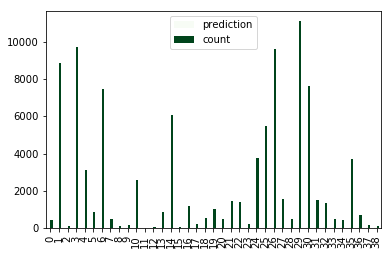

In [47]:
histogram.toPandas().plot.bar(colormap='Greens')